In [ ]:
Huy Ngo - C

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

df.head()



,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [3]:
'''your code here'''
total_passengers = df.shape[0]

percentage_male = (df['Sex'].sum() / total_passengers) * 100

percentage_survived = (df['Survived'].sum() / total_passengers) * 100

print(f"Total number of passengers: {total_passengers}")
print(f"Percentage of male passengers: {percentage_male:.2f}%")
print(f"Percentage of survivors: {percentage_survived:.2f}%")

Total number of passengers: 891
Percentage of male passengers: 64.76%
Percentage of survivors: 38.38%


Your written answer:

 - Total number of passengers: 891
 - Percentage of male passengers: 64.76%
 - Percentage of survivors: 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [4]:
female_passengers = df[df['Sex'] == 0]
female_survival_rate = (female_passengers['Survived'].sum() / female_passengers.shape[0]) * 100

male_passengers = df[df['Sex'] == 1]
male_survival_rate = (male_passengers['Survived'].sum() / male_passengers.shape[0]) * 100

print(f"Percentage of female passengers who survived: {female_survival_rate:.2f}%")
print(f"Percentage of male passengers who survived: {male_survival_rate:.2f}%")


Percentage of female passengers who survived: 74.20%
Percentage of male passengers who survived: 18.89%


Your written answer:

 - Percentage of female passengers who survived: 74.20%
 - Percentage of male passengers who survived: 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [6]:
class_summary = df.groupby('Pclass').agg(
    total_tickets=('Pclass', 'size'),  # Count the number of tickets per class
    survivors=('Survived', 'sum')      # Count the number of survivors per class
)

class_summary['percentage_of_total_tickets'] = (class_summary['total_tickets'] / total_passengers) * 100
class_summary['survival_percentage'] = (class_summary['survivors'] / class_summary['total_tickets']) * 100

class_summary = class_summary[['percentage_of_total_tickets', 'survival_percentage']]
print(class_summary)

        percentage_of_total_tickets  survival_percentage
Pclass                                                  
1                         24.242424            62.962963
2                         20.650954            47.282609
3                         55.106622            24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.242424
    - % survivorship: 62.962963
- Class 2 
    - % tickets: 20.650954
    - % survivorship: 47.282609
- Class 3
    - % tickets: 55.106622
    - % survivorship: 24.236253


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors DataFrame:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors DataFrame:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


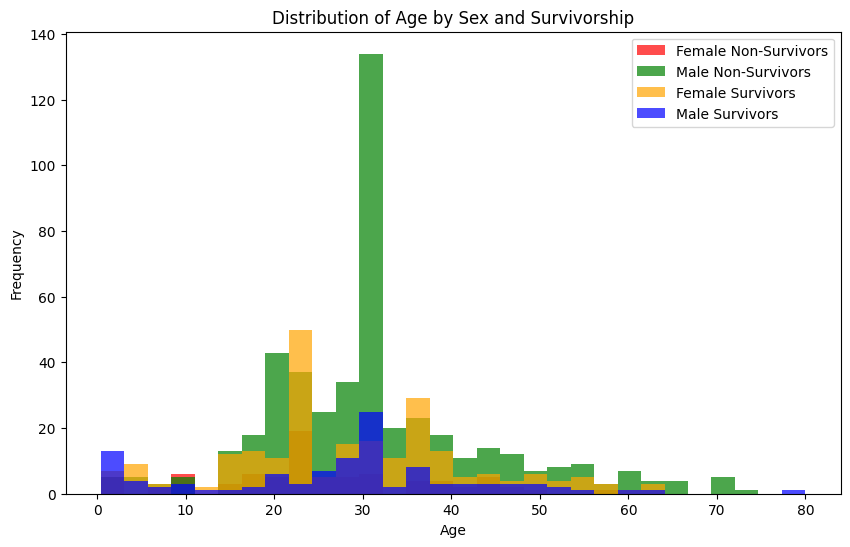

In [10]:
'''Your code here'''
survivorDf = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]

nonSurvivorDf = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]

print("Survivors DataFrame:")
print(survivorDf.head())

print("\nNon-Survivors DataFrame:")
print(nonSurvivorDf.head())

plt.figure(figsize=(10, 6))

colors = ['blue', 'orange', 'green', 'red']

plt.hist([
    survivorDf[survivorDf['Sex'] == 1]['Age'].dropna(),  
    survivorDf[survivorDf['Sex'] == 0]['Age'].dropna(),  
    nonSurvivorDf[nonSurvivorDf['Sex'] == 1]['Age'].dropna(), 
    nonSurvivorDf[nonSurvivorDf['Sex'] == 0]['Age'].dropna()
    ],
    bins=30,
    color=colors,
    label=['Male Survivors', 'Female Survivors', 'Male Non-Survivors', 'Female Non-Survivors'],
    alpha=0.7,
    histtype='stepfilled'
)

plt.title('Distribution of Age by Sex and Survivorship')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend(loc='upper right')
plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

/var/folders/kc/0qd5t9gs325742vz2mt6_7mr0000gn/T/ipykernel_39547/1978203823.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({1: 0, 0: 1})  # 0 is female, 1 is male


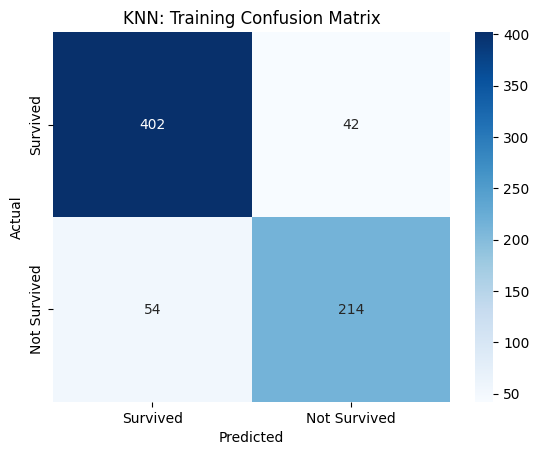

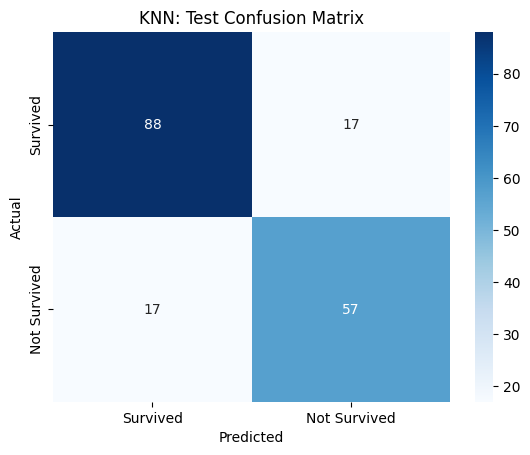

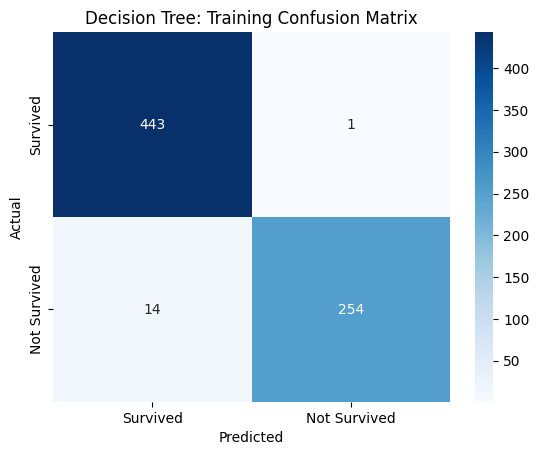

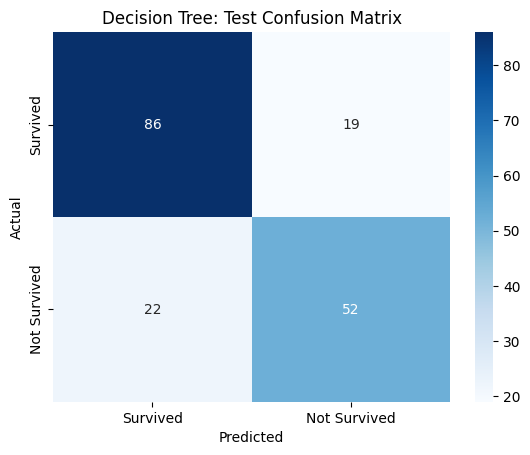

KNN Classifier: (Training Data)
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       444
           1       0.84      0.80      0.82       268

    accuracy                           0.87       712
   macro avg       0.86      0.85      0.86       712
weighted avg       0.86      0.87      0.86       712

KNN Classifier: (Test Data)
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Decision Tree Classifier: (Training Data)
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       444
           1       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98   

In [15]:
'''Your code here'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df_clean = df.dropna(subset=['Age', 'Fare']) #drops rows with missing data

X = df_clean[features]
y = df_clean['Survived']

X['Sex'] = X['Sex'].map({1: 0, 0: 1})  # 0 is female, 1 is male

#(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5) #tuning hyperparam here
knn.fit(X_train_scaled, y_train)

dtree = DecisionTreeClassifier(random_state=42) #tuning hyperparam here
dtree.fit(X_train_scaled, y_train)

knn_train_pred = knn.predict(X_train_scaled)
knn_test_pred = knn.predict(X_test_scaled)

dtree_train_pred = dtree.predict(X_train_scaled)
dtree_test_pred = dtree.predict(X_test_scaled)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived', 'Not Survived'], yticklabels=['Survived', 'Not Survived'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

knn_train_cm = confusion_matrix(y_train, knn_train_pred)
knn_test_cm = confusion_matrix(y_test, knn_test_pred)

dtree_train_cm = confusion_matrix(y_train, dtree_train_pred)
dtree_test_cm = confusion_matrix(y_test, dtree_test_pred)

plot_confusion_matrix(knn_train_cm, title='KNN: Training Confusion Matrix')
plot_confusion_matrix(knn_test_cm, title='KNN: Test Confusion Matrix')
plot_confusion_matrix(dtree_train_cm, title='Decision Tree: Training Confusion Matrix')
plot_confusion_matrix(dtree_test_cm, title='Decision Tree: Test Confusion Matrix')


print("KNN Classifier: (Training Data)")
print(classification_report(y_train, knn_train_pred))
print("KNN Classifier: (Test Data)")
print(classification_report(y_test, knn_test_pred))

print("Decision Tree Classifier: (Training Data)")
print(classification_report(y_train, dtree_train_pred))
print("Decision Tree Classifier: (Test Data)")
print(classification_report(y_test, dtree_test_pred))


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - KNN: Performs better on the training data (87% accuracy) than on the test data (81%). There's some overfitting.
 - Decision Tree: Performs excellently on the training data (98% accuracy) but drops to 77% on the test data. There's significant overfitting.


Which models did you fit and which worked better?
 - Models Fitted: KNN and Decision Tree.
 - Better Model: KNN worked slightly better on the test data (81%) compared to Decision Tree (77%). Both models overfit the training data.